In [9]:
# Imports
import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else'cpu')
print(device)

PyTorch Version: 2.5.1
cpu


Matplotlib is building the font cache; this may take a moment.


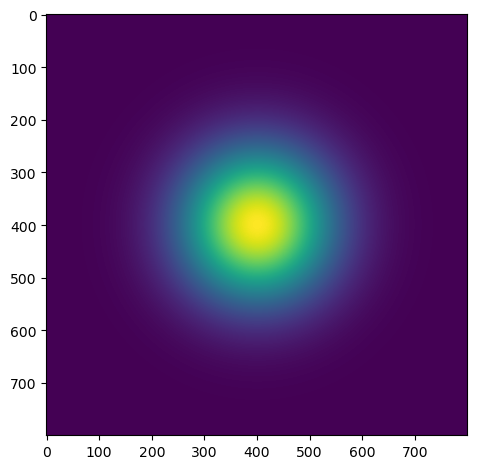

In [ ]:
#1.1

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)

#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())
plt.tight_layout()
plt.show()

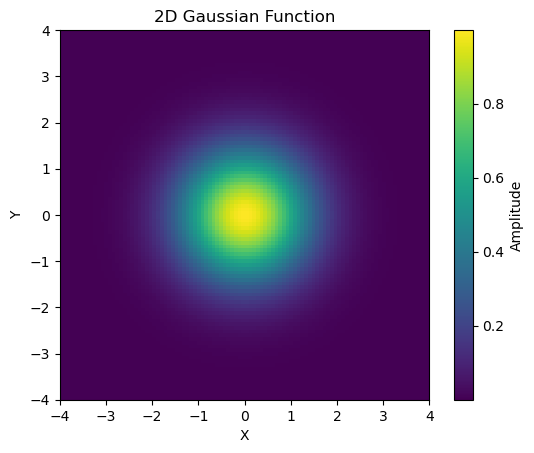

In [16]:
#1.2
# Parameters
sigma = 1.0  # standard deviation
size = 100   # grid size

# Create grid of (x,y) coordinates
x = np.linspace(-4, 4, size)
y = np.linspace(-4, 4, size)
X, Y = np.meshgrid(x, y)

# 2D Gaussian function
Z = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Plot
plt.imshow(Z, extent=(-4, 4, -4, 4), origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title('2D Gaussian Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


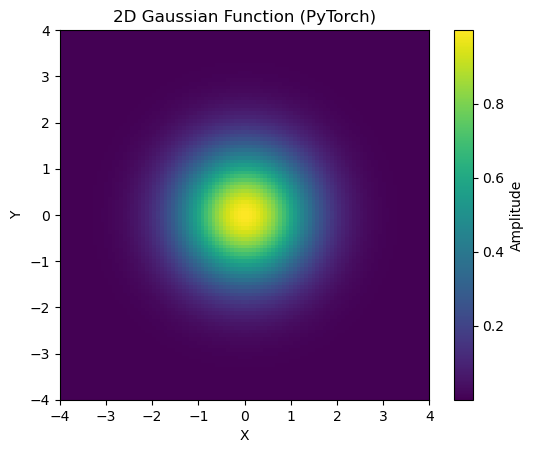

In [17]:
# 1.2 Conversion to PyTorch
# ----- Device -----
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# ----- Params -----
sigma = 1.0
size = 100

# ----- Grid (tensors) -----
x = torch.linspace(-4, 4, size, device=device)
y = torch.linspace(-4, 4, size, device=device)
Y, X = torch.meshgrid(y, x, indexing="ij")  # shape [size, size]

# ----- 2D Gaussian -----
Z = torch.exp(-(X**2 + Y**2) / (2 * sigma**2))

# ----- Plot (move to CPU -> NumPy) -----
plt.imshow(Z.detach().cpu().numpy(), extent=(-4, 4, -4, 4), origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title('2D Gaussian Function (PyTorch)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


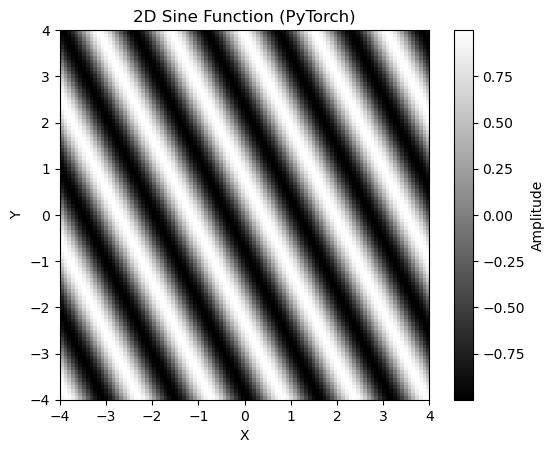

In [19]:
#1.2 Gaussian to Sine Function
# ----- Device -----
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# ----- Params -----
size = 100
kx, ky, phase = 4.0, 2.0, 0.0  # controls stripe frequency & orientation

# ----- Grid (tensors) -----
x = torch.linspace(-4, 4, size, device=device)
y = torch.linspace(-4, 4, size, device=device)
Y, X = torch.meshgrid(y, x, indexing="ij")  # shape [size, size]

# ----- 2D Sine -----
Z = torch.sin(kx * X + ky * Y + phase)

# ----- Plot -----
plt.imshow(Z.detach().cpu().numpy(), extent=(-4, 4, -4, 4), origin='lower', cmap='gray')
plt.colorbar(label='Amplitude')
plt.title('2D Sine Function (PyTorch)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
